In [1]:
## Goal: Explore data w/ visualizations for Adventure Works dataset 
      #    for purpose of Classification Supervised ML w/ label= BikeBuyer

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_C = pd.read_csv('AdvWorksCusts_Preped.csv', header=0)
print(AW_Custs_C.shape)
AW_Custs_C.head(5)

(16404, 21)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,4/8/1966,Bachelors,...,M,M,1,0,0,2,137947,31,89,0
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,5/14/1965,Bachelors,...,M,S,0,1,3,3,101141,32,117,1
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,8/12/1965,Bachelors,...,M,M,1,1,3,3,91945,32,123,0
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,2/15/1968,Bachelors,...,F,S,0,1,0,0,86688,29,50,0
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,8/8/1968,Bachelors,...,F,S,1,4,5,5,92771,29,95,1


In [3]:
# Testing for Class Imbalance by Examining Classes where label= BikeBuyer
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

AW_Custs_C_counts =  AW_Custs_C['BikeBuyer'].value_counts()
print(AW_Custs_C_counts) 

0    10949
1     5455
Name: BikeBuyer, dtype: int64


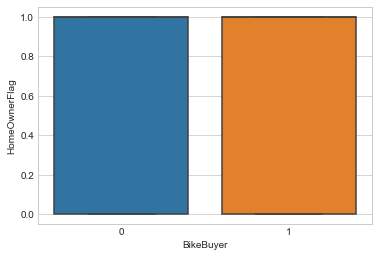

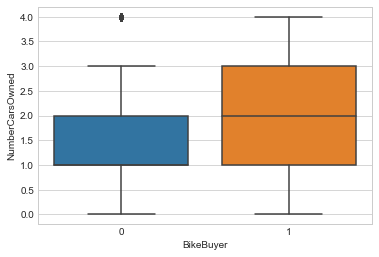

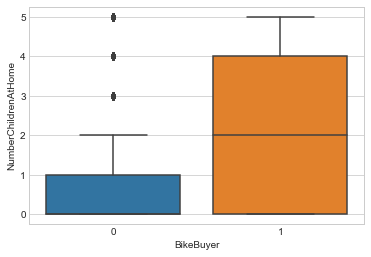

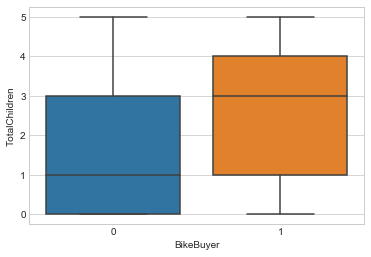

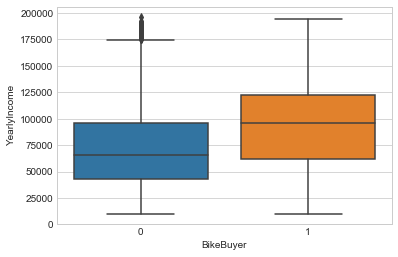

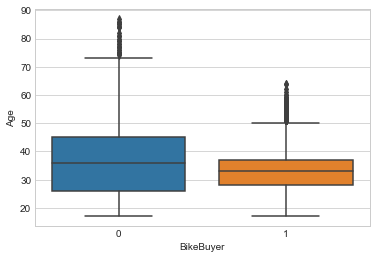

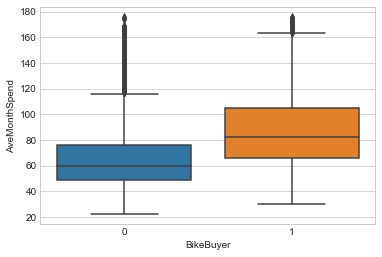

In [4]:
#Above- Almost twice as many people have NOT purchased a bike vs. people who have bought a bike.
   #  Since people who have bought a bike is only ~30% of all cases, this could bias the training of classification model.
    
#Below- Visualize Class Separation by Numeric Features

def plot_box(AW_Custs_C, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = AW_Custs_C)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
            'TotalChildren', 'YearlyIncome', 'Age', 'AveMonthSpend']
plot_box(AW_Custs_C, num_cols)

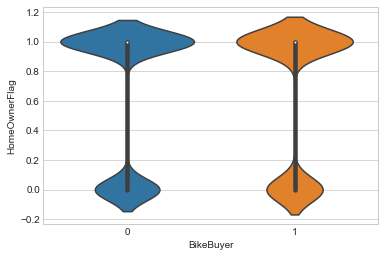

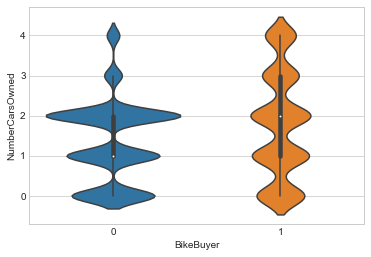

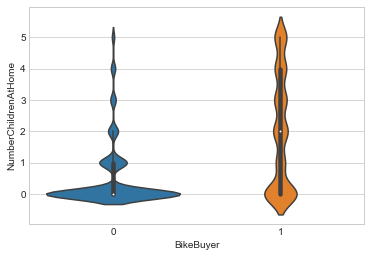

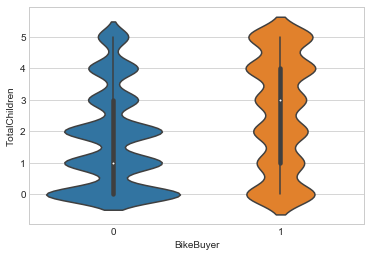

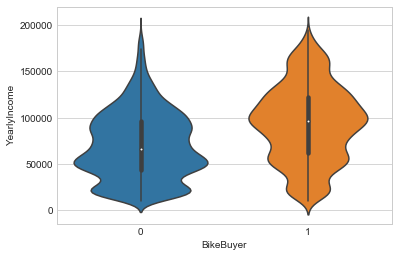

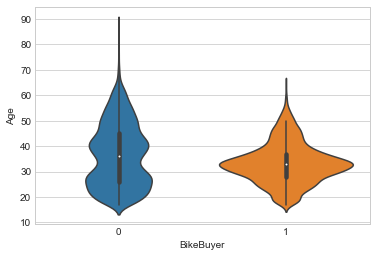

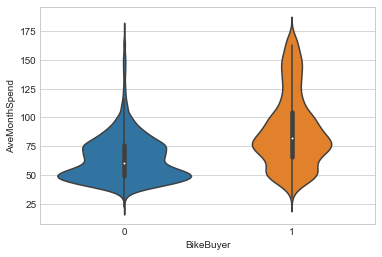

In [5]:
#Above- 
   # Median # of cars owned by customers who bought a bike is higher than for customers who didn't.
   # Median YearlyIncome is higher for customers who bought a bike than for customers who didn't.

#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(AW_Custs_C, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = AW_Custs_C)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(AW_Custs_C, num_cols)

FirstName


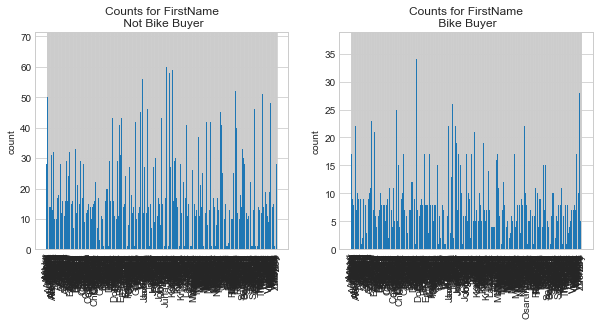

LastName


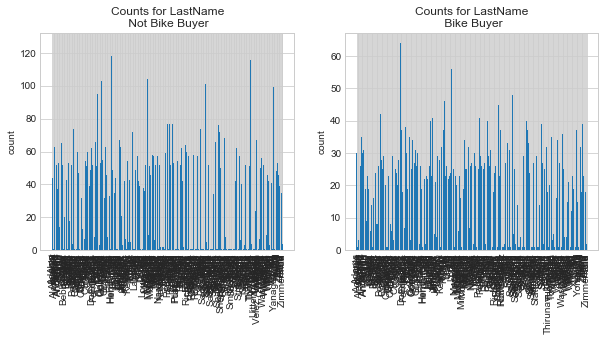

City


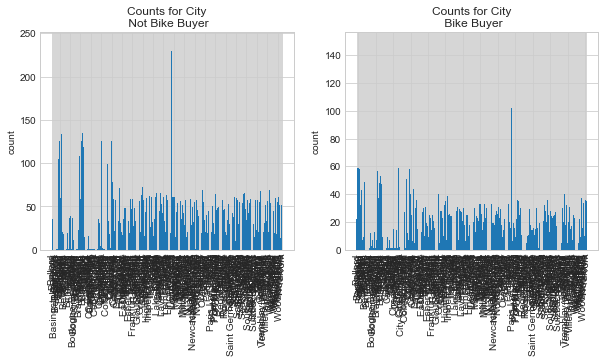

StateProvinceName


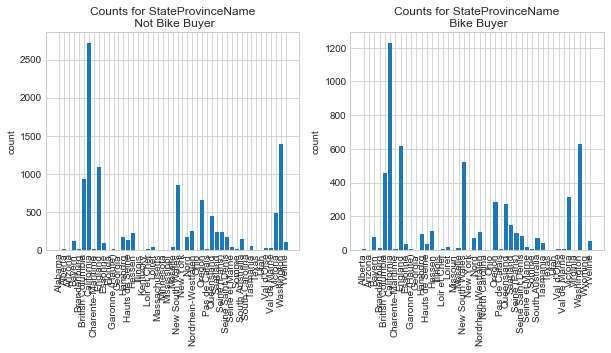

CountryRegionName


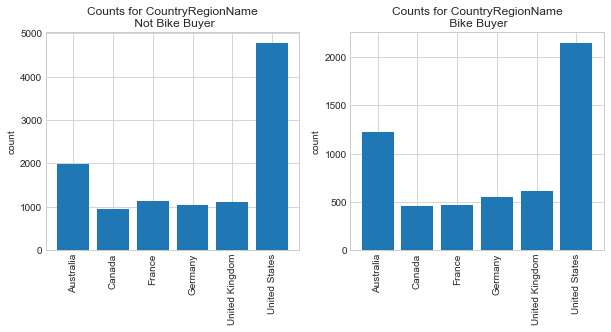

PostalCode


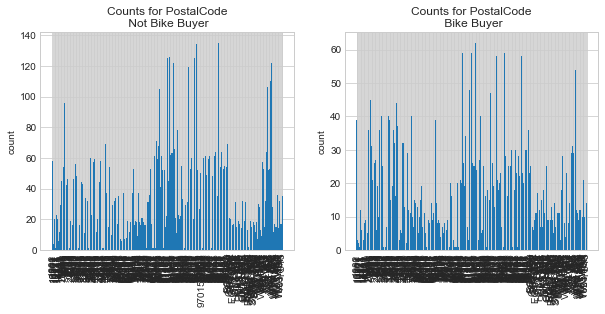

Education


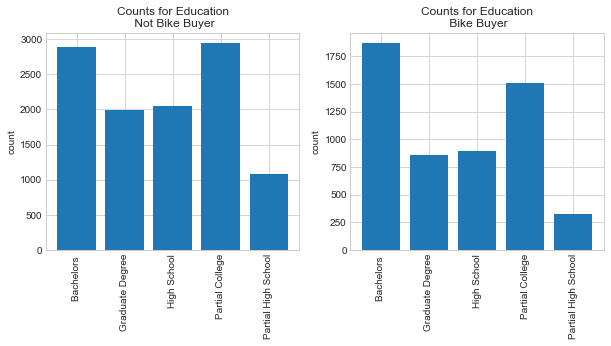

Occupation


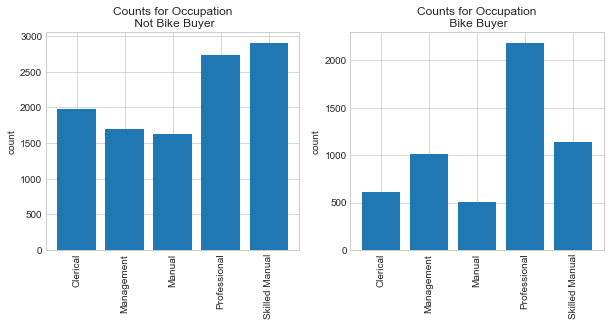

Gender


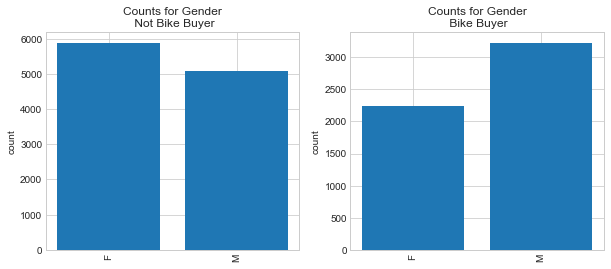

MaritalStatus


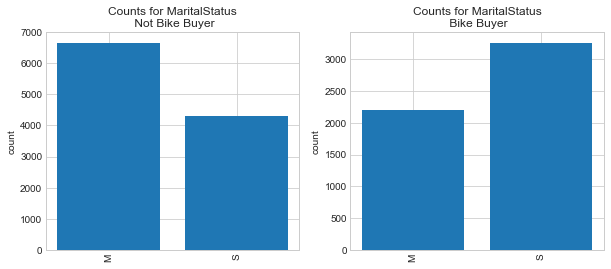

In [6]:
#Above-

#Below- Visualize Class Separation by Categorical Features

cat_cols = ['FirstName', 'LastName',  'City',
            'StateProvinceName', 'CountryRegionName', 'PostalCode', 
             'Education', 'Occupation', 'Gender', 'MaritalStatus']
#Had to remove AddressLine1, PhoneNumber, & BirthDate

AW_Custs_C['dummy'] = np.ones(shape = AW_Custs_C.shape[0])
for col in cat_cols:
    print(col)
    counts = AW_Custs_C[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Not Bike Buyer')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Bike Buyer')
    plt.ylabel('count')
    plt.show()

In [14]:
##Feature Engineering for Classification
 # A log transformation can be used on skewed data with no values =<0
    
# Apply log to each element of the following numeric columns in data frame using Pandas applymap
AW_Custs_C[['log_YearlyIncome', 'log_Age', 'log_AveMonthSpend']] = AW_Custs_C[['YearlyIncome', 'Age', 'AveMonthSpend']].applymap(math.log)

HomeOwnerFlag


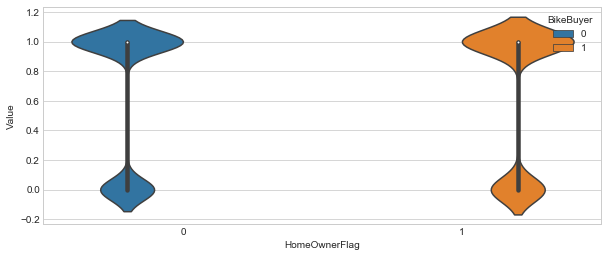

NumberCarsOwned


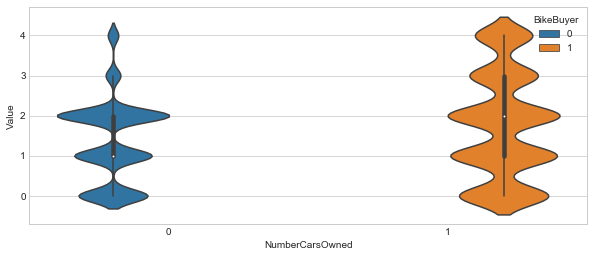

NumberChildrenAtHome


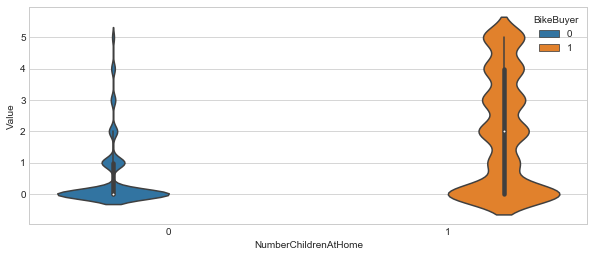

TotalChildren


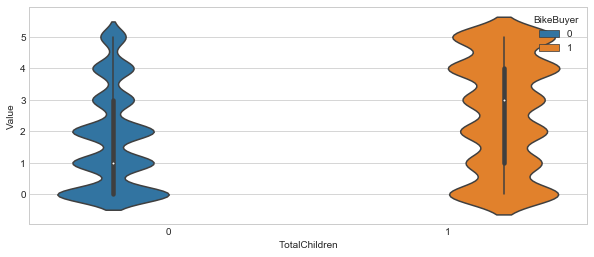

log_YearlyIncome


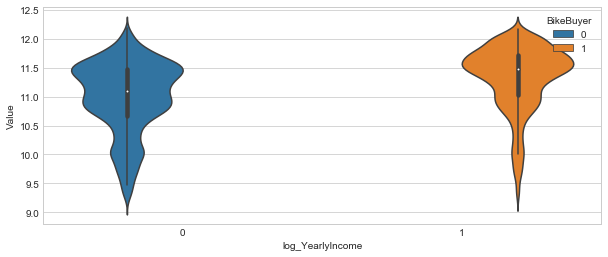

YearlyIncome


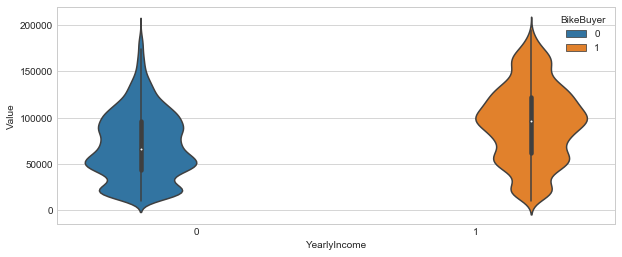

log_Age


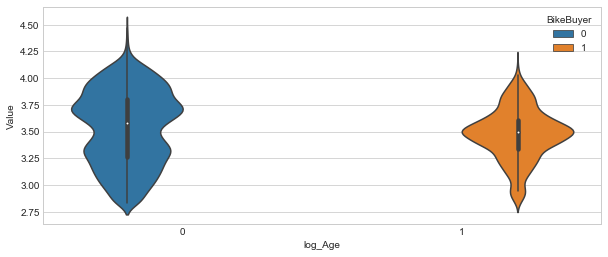

Age


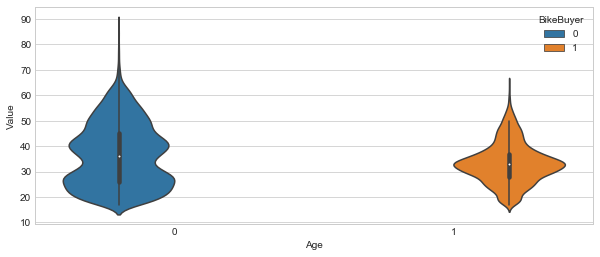

log_AveMonthSpend


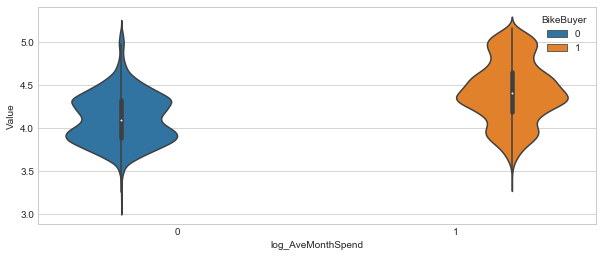

AveMonthSpend


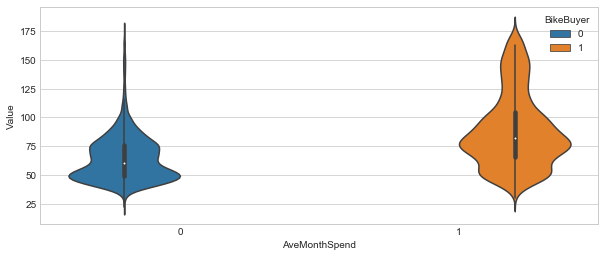

In [15]:
#Display violin plot distributions of log transformed features & raw features

num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 
            'TotalChildren','log_YearlyIncome', 'YearlyIncome','log_Age', 'Age', 'log_AveMonthSpend', 'AveMonthSpend']

for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10, 4))
    sns.violinplot(x = 'BikeBuyer', y = col, hue = 'BikeBuyer', data = AW_Custs_C)
    plt.ylabel('Value')
    plt.xlabel(col)
    plt.show()

In [ ]:
# Log transformations seem more symmetrical only for AveMonthSpend but it doesn't seem to do anything for Age & YearlyIncome.
 # Also don't seem to separate label cases any better, thus won't be used in training supervised machine learning model.